<a href="https://colab.research.google.com/github/rpasquini/herramientas-econometricas-2022/blob/main/Regression_Discontinuity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#!pip install linearmodels
import pandas as pd
#from scipy import stats  
#import numpy as np
#from sklearn.neighbors import KNeighborsRegressor
#from linearmodels.iv import IV2SLS
import statsmodels.api as sm


In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/rpasquini/herramientas-econometricas-2022/main/datos/drinking.csv')
df.columns

Index(['agecell', 'all', 'allfitted', 'internal', 'internalfitted', 'external',
       'externalfitted', 'alcohol', 'alcoholfitted', 'homicide',
       'homicidefitted', 'suicide', 'suicidefitted', 'mva', 'mvafitted',
       'drugs', 'drugsfitted', 'externalother', 'externalotherfitted'],
      dtype='object')

**agecell** :  Edad de la celda correspondiente. La celda hace referencia a un intervalo de edad donde se calcula el promedio de fallecimientos por causa. \

**all**: Tasa de fallecimiento total

**mva**:  (moving vehicle accident) fallecimiento en automotor 

**suicide**: fallecimiento por suicidio. \


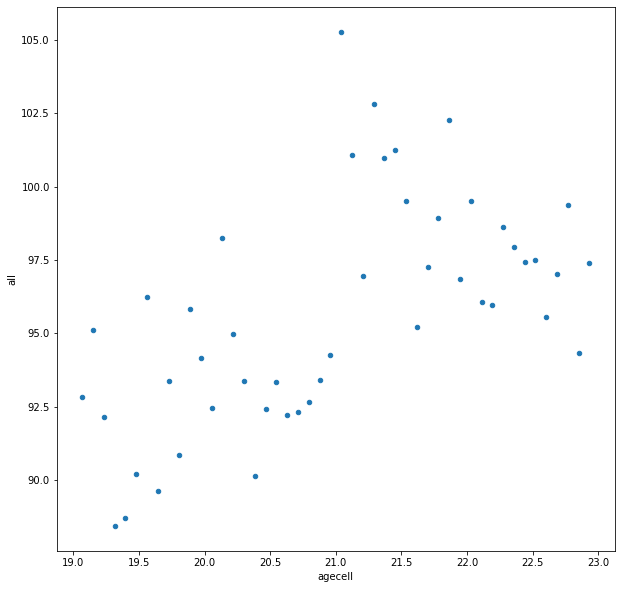

In [7]:
df.plot.scatter(x="agecell", y="all")

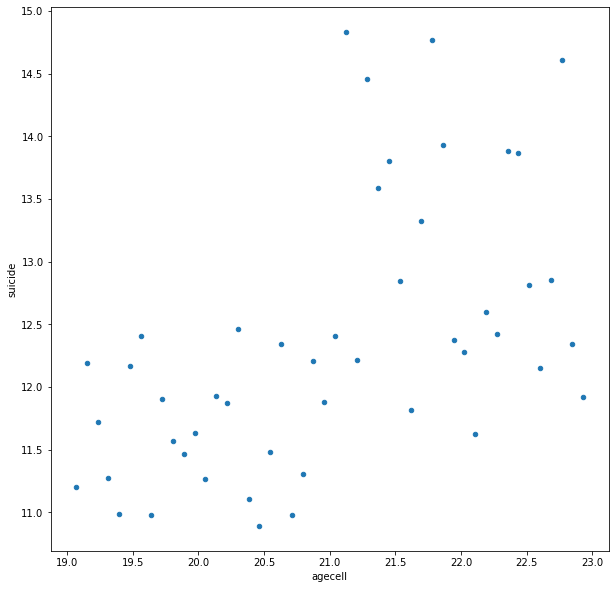

In [8]:
df.plot.scatter(x="agecell", y="suicide")

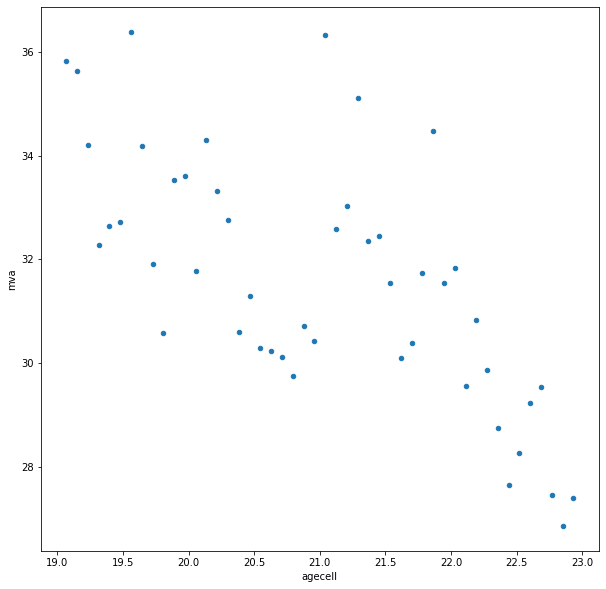

In [9]:
df.plot.scatter(x="agecell", y="mva")

In [10]:
df['X']=df['agecell']-21
# Metodo alternativo para dummy
df=df.assign(mayor21=(df["agecell"] >= 21).astype(int))
# Interaccion
df['interaccion']=df["mayor21"]*df["X"]
df.head(3)


,agecell,all,allfitted,internal,internalfitted,external,externalfitted,alcohol,alcoholfitted,homicide,...,suicidefitted,mva,mvafitted,drugs,drugsfitted,externalother,externalotherfitted,X,mayor21,interaccion
0,19.068493,92.825400,91.706150,16.617590,16.738130,76.207820,74.968010,0.639138,0.794345,16.316818,...,11.592100,35.829327,34.817780,3.872425,3.448835,8.534373,8.388236,-1.931507,0,-0.0
1,19.150684,95.100740,91.883720,18.327684,16.920654,76.773056,74.963066,0.677409,0.837575,16.859964,...,11.593611,35.639256,34.633890,3.236511,3.470022,8.655786,8.530174,-1.849316,0,-0.0
2,19.232876,92.144295,92.049065,18.911053,17.098843,73.233240,74.950226,0.866443,0.877835,15.219254,...,11.595129,34.205650,34.446735,3.202071,3.492069,8.513741,8.662681,-1.767124,0,-0.0


In [11]:
def regress(lista, data):
    """ 
    Funcion que realiza la regresion OLS
    La primera variable de la lista es la dependiente, el resto son las explicativas
    data es la base de datos
    """
    datos=data[lista]
    # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
    datos=datos.dropna()
    Y=datos[lista[0]]
    X=datos[lista[1:]]
    X=sm.add_constant(X)
    modelo=sm.OLS(Y,X)
    resultados=modelo.fit()
    print(resultados.summary())
    return resultados

In [12]:
modelo1=regress(['all','X','mayor21','interaccion'], data=df)

                            OLS Regression Results                            
Dep. Variable:                    all   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     29.47
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           1.33e-10
Time:                        21:18:49   Log-Likelihood:                -105.64
No. Observations:                  48   AIC:                             219.3
Df Residuals:                      44   BIC:                             226.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          93.6184      0.932    100.399      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


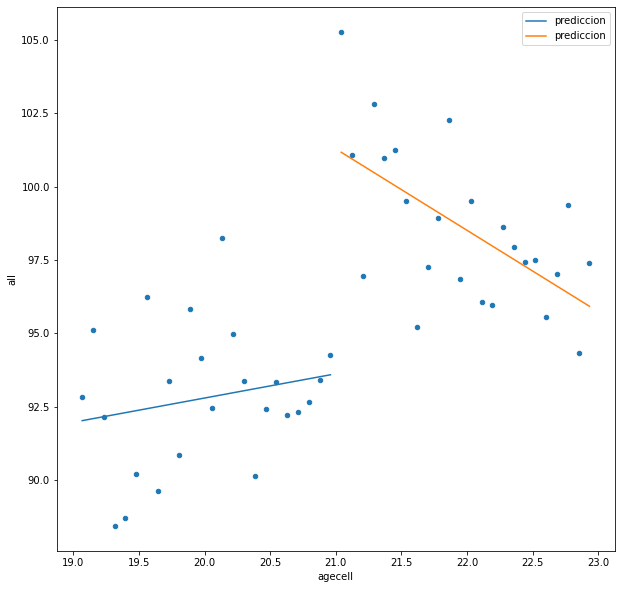

In [29]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] #this sets the size of the figure
df2=df[['agecell','all','X']].dropna()
modelo1.predict().shape
ax = df2.plot.scatter(x="agecell", y="all")
df2=df2.assign(prediccion=modelo1.predict())
df2.loc[df2.agecell<21].plot(x="agecell", y="prediccion", ax=ax)
df2.loc[df2.agecell>=21].plot(x="agecell", y="prediccion", ax=ax)



In [32]:
modelo2=regress(['mva','X','mayor21','interaccion'], data=df)

                            OLS Regression Results                            
Dep. Variable:                    mva   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     38.13
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           2.67e-12
Time:                        21:23:29   Log-Likelihood:                -78.586
No. Observations:                  48   AIC:                             165.2
Df Residuals:                      44   BIC:                             172.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          29.9292      0.531     56.390      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


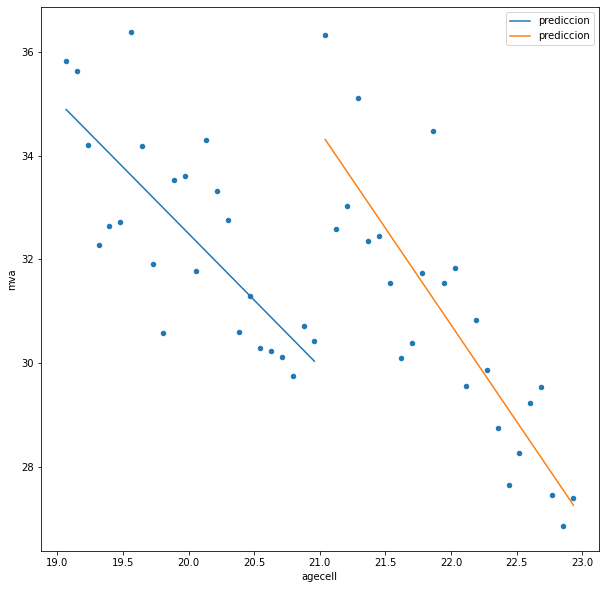

In [35]:
df3=df[['agecell','mva','X']].dropna()
modelo2.predict().shape
ax = df3.plot.scatter(x="agecell", y="mva")
df3=df3.assign(prediccion=modelo2.predict())
df3.loc[df3.agecell<21].plot(x="agecell", y="prediccion", ax=ax)
df3.loc[df3.agecell>=21].plot(x="agecell", y="prediccion", ax=ax)

# Levantamos datos de la Ley de Alquileres

In [16]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 20.5 MB/s 
     |████████████████████████████████| 6.3 MB 54.8 MB/s 
     |████████████████████████████████| 16.7 MB 52.3 MB/s 


In [17]:
import geopandas as gpd

In [18]:
gdf=gpd.read_file('https://github.com/rpasquini/urban-econometrics/blob/master/data/ley_alq_clase.zip?raw=true')

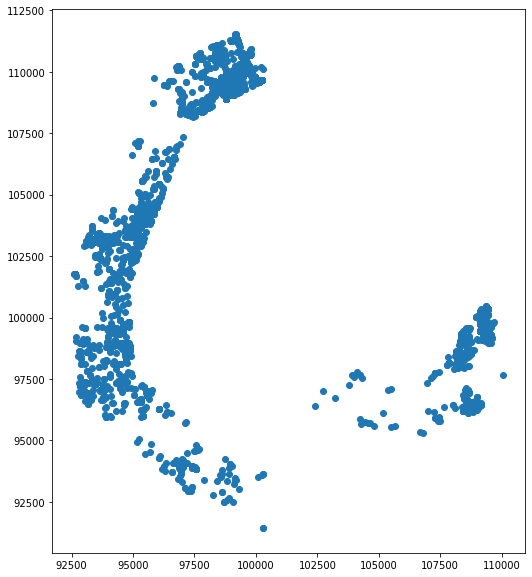

In [19]:
gdf.plot()

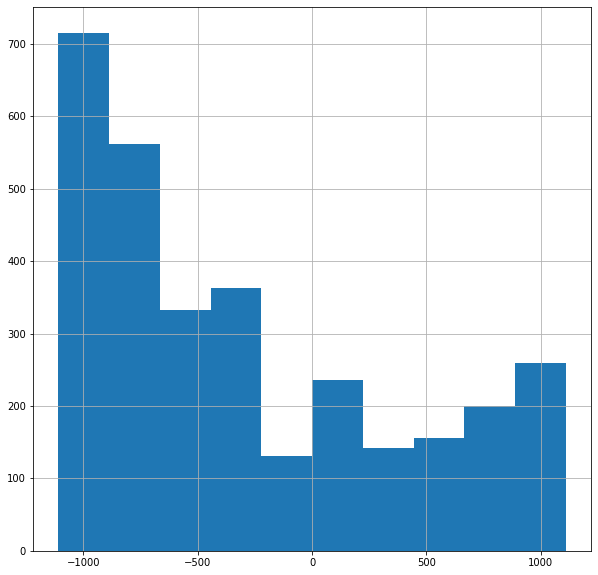

In [20]:
gdf.delta.hist()

In [21]:
gdf2=gdf[['logpricem2', 'delta', 'treatment', 'Tdelta', 'post', 'DD',
       'damenities']]

# Trabajando con R en Colab y combinando R y Python

El siguiente hipervinculo me permite trabajar con un notebook directamente en R usando Colab

[Start R](https://colab.research.google.com/notebook#create=true&language=r)

Pero no voy en este mismo notebook. Para eso voy a usar celdas especiales para R utilizando un prefijo en la celda que le dirá a colab que allí trabajaremos en R.


In [22]:
# activate R magic
%load_ext rpy2.ipython

In [23]:
%%R
install.packages('rdrobust')

(as ‘lib’ is unspecified)







	‘/tmp/RtmpIsrpVp/downloaded_packages’



In [24]:
import rpy2
from rpy2.robjects import pandas2ri
pandas2ri.activate()
# La siguiente función me permite pasar una base de datos a R
rpy2.robjects.globalenv['gdf2'] = gdf2

In [25]:
%%R
library('rdrobust')
rdrobust(gdf2$logpricem2, gdf2$delta,c=0)
summary(rdrobust(y=gdf2$logpricem2, x=gdf2$delta))

Sharp RD estimates using local polynomial regression.

Number of Obs.                 3098
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 2104          994
Eff. Number of Obs.              69          190
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                 168.879      168.879
BW bias (b)                 333.780      333.780
rho (h/b)                     0.506        0.506
Unique Obs.                    1296          607

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.703     0.105     6.710     0.000     [0.498 , 0.909]     
        Robust         -         -     6.124     0.000     [0.490 , 0.952]     


[1] "Mass points detected in the running variable."


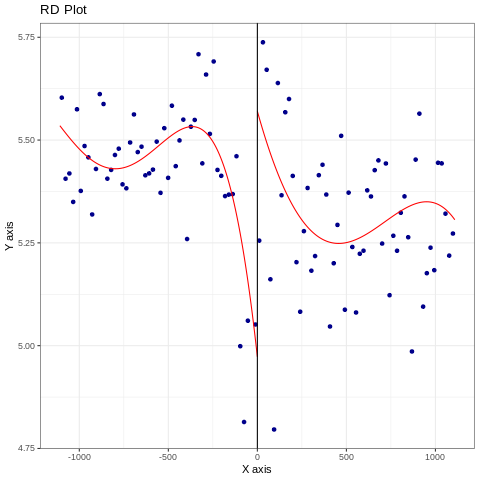

In [26]:
%%R
rdplot(y=gdf2$logpricem2, x=gdf2$delta)